# Tank module

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

TANK_FILE = f'sample_data/{[file for file in sorted(os.listdir('sample_data')) if 'tank' in file][-1]}'

,timestamp,about_node_name,volts,temperature
0,1.729295e+09,tank1-depth2,0.048743,375.20
1,1.729295e+09,tank1-depth2,0.056137,361.42
2,1.729295e+09,tank1-depth2,0.038071,400.36
3,1.729295e+09,tank1-depth2,0.056078,361.52
4,1.729295e+09,tank1-depth1,0.054151,364.90


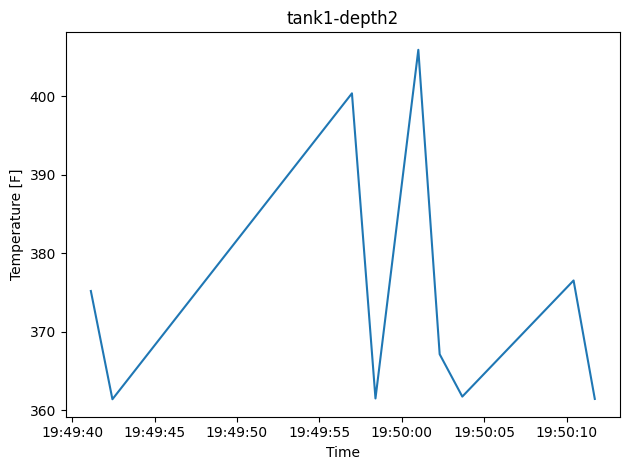

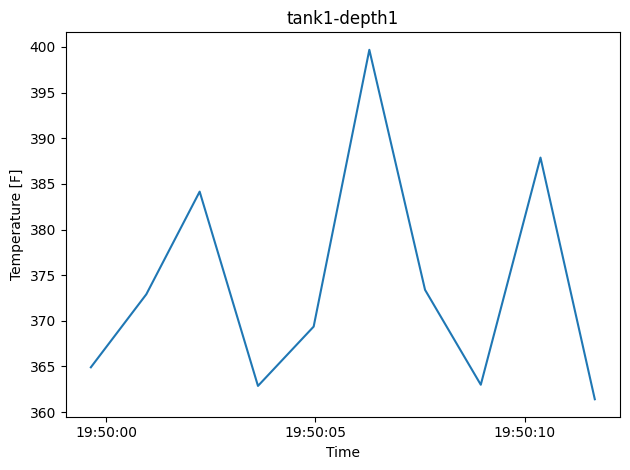

In [2]:
if os.path.exists(TANK_FILE):
    
    df_tank = pd.read_csv(TANK_FILE)
    display(df_tank.head())

    df_tank['timestamp'] = pd.to_datetime(list(df_tank['timestamp']), unit='s', utc=True).tz_convert('America/New_York')

    for tank_layer in set(df_tank['about_node_name']):

        df_tank_layer = df_tank[df_tank.about_node_name==tank_layer]
        
        plt.title(tank_layer)
        plt.xlabel('Time')
        plt.plot(df_tank_layer.timestamp, df_tank_layer.temperature)
        plt.ylabel('Temperature [F]')
        plt.tight_layout()
        plt.show()